In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
time = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]) 
use_time = np.array([0, 5, 10, 15, 30, 45, 60, 120, 240]) # в минутах

# вероятности включения для 1-го класса электроприборов
class1_N = 5 
class1_power = (0.12,2.2) # min,max мощность
class1_sessions = 2 # max кол-во включений в день
class1_switch = np.array([0, 0, 0, 0, 5, 10, 25, 20, 0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0]) 
class1_switch = class1_switch / np.sum(class1_switch) 

class1_tou = np.array([15, 25, 25, 15, 15, 15,  25, 0,  0]) 
class1_tou = class1_tou / np.sum(class1_tou) 

# вероятности включения для 2-го класса электроприборов
class2_N = 8 
class2_power = (0.06,2.2)
class2_sessions = 3
class2_switch = np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 35, 40, 50, 49, 35, 20, 0, 0]) 
class2_switch = class2_switch / np.sum(class2_switch) 

class2_tou = np.array([15, 15, 15, 15, 15, 25,  25, 25,  25]) 
class2_tou = class2_tou / np.sum(class2_tou) 

# вероятности включения для 3-го класса электроприборов
class3_N = 1
class3_power = (0.6,0.6)
class3_sessions = 4
class3_switch = np.array([5, 5, 0, 0, 0,10, 0, 10, 0, 10, 0, 0, 0, 0, 0, 10, 10, 0, 0, 0,0 , 0, 0, 10]) 
class3_switch = class3_switch / np.sum(class3_switch) 

class3_tou = np.array([15, 15, 15, 15, 15, 15,  15, 15,  15]) 
class3_tou = class3_tou / np.sum(class3_tou)

In [ ]:
class Pribor:
  """
  Пример класса для электроприбора
  """

  def __init__(self, power, switch_time, use_time):
    self.power = power # номинальная мощность электроприбора
    self.turn_on = switch_time * 60 + np.random.randint(0,59) # время включения в минутах
    self.turn_off = self.turn_on + use_time # время отключения в минутах

    self.sessions = len(switch_time) # кол-во включений за день

    self.state = 0 # текущее состосния (вкл=1, откл=0)

In [ ]:
def add_eq(obj_list, N, power, sessions, switch_proba, tou_proba):

    ses = [np.random.randint(0, sessions) for _ in range(N)]

    eqs = [
        Pribor(
            power = np.random.uniform(power[0], power[1]),
            switch_time = np.random.choice(time, size=ses[i], p=switch_proba),
            use_time = np.random.choice(use_time, size=ses[i], p=tou_proba),
            )
        for i in range(N)
    ]

    obj_list += eqs

    return obj_list

In [ ]:
profile_dataset = []

for _ in range(500):

    obj_list = []
    obj_list = add_eq(obj_list, N=class1_N, power=class1_power, sessions=class1_sessions, switch_proba=class1_switch, tou_proba=class1_tou)
    obj_list = add_eq(obj_list, N=class2_N, power=class2_power, sessions=class2_sessions, switch_proba=class2_switch, tou_proba=class2_tou)
    obj_list = add_eq(obj_list, N=class3_N, power=class3_power, sessions=class3_sessions, switch_proba=class3_switch, tou_proba=class3_tou)

    electric_load = []

    for dt in range(24*60): # шаг моделирования - 1 мин
      power_dt = 0 # обнуляем переменную мощности данного шага моделирования
      for eq in obj_list: # для каждого электроприбора 
        for s in range(eq.sessions): # перебрать все включения электроприбора за день
          if eq.turn_on[s] == dt: # если время включения равно текущему времени моделирования,
            eq.state = 1 # то включить прибор
          if eq.turn_off[s] == dt: # если время отключения равно текущему времени моделирования,
            eq.state = 0 # то отключить прибор
        if eq.state == 1: # если электроприбора включен, то
          power_dt += eq.power # увеличить потребляемую мощность на мощность включенного электроприбора
      electric_load.append(power_dt)

    profile_dataset.append(electric_load)

385.1059802187779

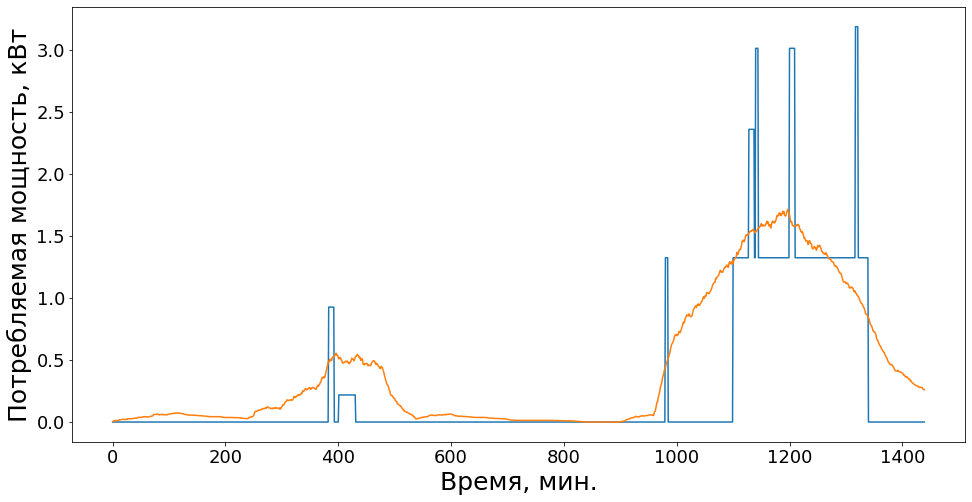

In [ ]:
obj_list = []
obj_list = add_eq(obj_list, N=class1_N, power=class1_power, sessions=class1_sessions, switch_proba=class1_switch, tou_proba=class1_tou)
obj_list = add_eq(obj_list, N=class2_N, power=class2_power, sessions=class2_sessions, switch_proba=class2_switch, tou_proba=class2_tou)
obj_list = add_eq(obj_list, N=class3_N, power=class3_power, sessions=class3_sessions, switch_proba=class3_switch, tou_proba=class3_tou)
electric_load = []

for dt in range(24*60): # шаг моделирования - 1 мин
  power_dt = 0 # обнуляем переменную мощности данного шага моделирования
  for eq in obj_list: # для каждого электроприбора 
    for s in range(eq.sessions): # перебрать все включения электроприбора за день
      if eq.turn_on[s] == dt: # если время включения равно текущему времени моделирования,
        eq.state = 1 # то включить прибор
      if eq.turn_off[s] == dt: # если время отключения равно текущему времени моделирования,
        eq.state = 0 # то отключить прибор
    if eq.state == 1: # если электроприбора включен, то
      power_dt += eq.power # увеличить потребляемую мощность на мощность включенного электроприбора
  electric_load.append(power_dt)
  
plt.rcParams.update({'axes.titlesize': 25, # заголовок 
                    'xtick.labelsize': 18, # метки осей Х
                    'ytick.labelsize': 18, # метки осей Y
                    'legend.fontsize' : 16, # легенда
                    'axes.labelsize': 25})  # название осей
plt.figure(figsize=(16,8))
plt.plot(electric_load)
df = np.array(profile_dataset)
plt.plot(df.mean(axis=0))
# подписи осей
plt.xlabel('Время, мин.')
plt.ylabel('Потребляемая мощность, кВт')
sum(electric_load)

649.3757438123095

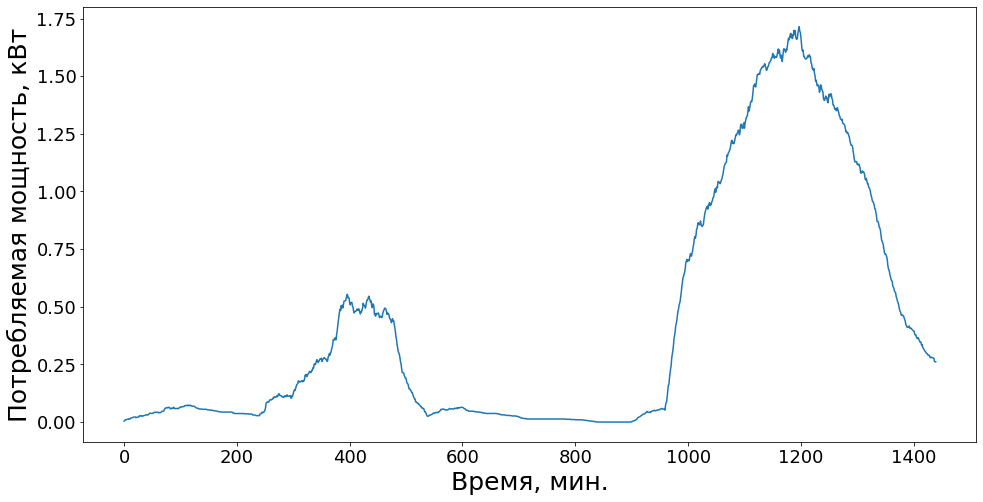

In [ ]:
df = np.array(profile_dataset)
plt.rcParams.update({'axes.titlesize': 25, # заголовок 
                    'xtick.labelsize': 18, # метки осей Х
                    'ytick.labelsize': 18, # метки осей Y
                    'legend.fontsize' : 16, # легенда
                    'axes.labelsize': 25})  # название осей
plt.figure(figsize=(16,8))



# подписи осей
plt.xlabel('Время, мин.')
plt.ylabel('Потребляемая мощность, кВт')
plt.plot(df.mean(axis=0))
sum(electric_load)